In [2]:
from pytorch_pretrained_bert.tokenization import BertTokenizer
from pytorch_pretrained_bert.optimization import BertAdam
from pytorch_pretrained_bert.modeling import BertModel, BertLayer,BertPooler, BertPreTrainedModel, BertConfig
from transformers import AutoModel
import torch
from torch.nn import init

bert = BertModel(BertConfig("/home/student/hoa/NLP/TinyBert/config.json"))
bert.load_state_dict(torch.load("/home/student/hoa/NLP/TinyBert/tiny_v2.pt"))

<All keys matched successfully>

In [51]:
bert.encoder.layer[0]
for module in bert.encoder.layer[0].modules():
    if isinstance(module, torch.nn.Linear):
        init.xavier_uniform_(module.weight)  # Khởi tạo trọng số
        if module.bias is not None:
            init.zeros_(module.bias)  # Khởi tạo bias
    elif isinstance(module, torch.nn.LayerNorm):
        init.ones_(module.weight)  # Khởi tạo gamma
        init.zeros_(module.bias)

In [1]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM
from transformers import AutoModel

# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")
torch.save(model.state_dict(),"/home/student/hoa/NLP/TinyBert/tinybert.pt")

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

In [164]:
state.keys()

odict_keys(['embeddings.word_embeddings.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.LayerNorm.weight', 'embeddings.LayerNorm.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.1.attention.self.query.weight', 'encoder.layer.1.attention.self.query.bi

In [165]:
import sys
sys.path.insert(-1,"/home/student/hoa/NLP/BERT-for-ABSA/src")
from modeling import *
bert = BertModel(BertConfig(vocab_size_or_config_json_file="/home/student/hoa/NLP/TinyBert/config_bert_base.json"))
bert.load_state_dict(state)

<All keys matched successfully>

In [142]:
import numpy as np
import json
def evaluate(pred_fn): 
    with open(pred_fn) as f:
        pred_json=json.load(f)    
    y_pred=[]
    for ix, logit in enumerate(pred_json["logits"]):
        pred=[0]*len(pred_json["raw_X"][ix])
        for jx, idx in enumerate(pred_json["idx_map"][ix]):
            lb=np.argmax(logit[jx])
            if lb==1: #B
                pred[idx]=1
            elif lb==2: #I
                if pred[idx]==0: #only when O->I (I->I and B->I ignored)
                    pred[idx]=2
        y_pred.append(pred)
    return y_pred

a = evaluate("/home/student/hoa/NLP/TinyBert/AE/OUT/rest/Test/test_predictions.json")
with open("/home/student/hoa/NLP/TinyBert/AE/Dataset/rest/test.json","r") as file:
    data = json.load(file)
label = []  
tmp = ['O','B','I'] 
for key,v in data.items():
    line = [tmp.index(i) for i in v['label']]
    label.append(line)

In [143]:

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
import pandas as pd
label= mlb.fit_transform(label)
a = mlb.transform(a)
# print(classification_report(label,a))
report = classification_report(label,a,output_dict=True)
df = pd.DataFrame(report).transpose()
# f1_score(label,a,average='macro')
df

,precision,recall,f1-score,support
0,1.000000,0.998521,0.999260,676.0
1,0.868895,0.804762,0.835600,420.0
2,0.620968,0.570370,0.594595,135.0
micro avg,0.917508,0.885459,0.901199,1231.0
macro avg,0.829954,0.791218,0.809818,1231.0
weighted avg,0.913701,0.885459,0.899043,1231.0
samples avg,0.936884,0.918393,0.905424,1231.0


In [4]:

# label

TypeError: 'int' object is not iterable

In [53]:
import json
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
out = "/home/student/hoa/NLP/TinyBert/ASC/OUT/Rest/check2"
with open(os.path.join(out,"test_predictions.json"),'r') as file:
    data = json.load(file)
pred = data['logits']
y_pred= []
for i in pred:
    lb=np.argmax(i)
    y_pred.append(lb)
with open("/home/student/hoa/NLP/TinyBert/ASC/Dataset/rest/test.json",'r') as file:
    data = json.load(file)
label = []
tmp = ["positive", "negative", "neutral"]
for k,v in data.items():
    label.append(tmp.index(v['polarity']))
print(sum(y_pred))
report = classification_report(label,y_pred,output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_excel(f"{out}/res.xlsx")

447


In [54]:
df

,precision,recall,f1-score,support
0,0.867591,0.945055,0.904668,728.000000
1,0.739130,0.780612,0.759305,196.000000
2,0.666667,0.408163,0.506329,196.000000
accuracy,0.822321,0.822321,0.822321,0.822321
macro avg,0.757796,0.711277,0.723434,1120.000000
weighted avg,0.809949,0.822321,0.809520,1120.000000


In [ ]:
# mlb = MultiLabelBinarizer()
# label= mlb.fit_transform(label)
# pred = mlb.transform(pred)


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       341
           1       0.46      0.67      0.55       128
           2       0.62      0.36      0.46       169

    accuracy                           0.67       638
   macro avg       0.63      0.62      0.60       638
weighted avg       0.68      0.67      0.66       638



In [10]:
import os
for root,_,files in os.walk("/home/student/hoa/StormProject"):
    for file_name in files:
        path = os.path.join(root,file_name)
        if "Save_Model" in path:
            if "model.pth" in path:
                continue
            os.remove(path)

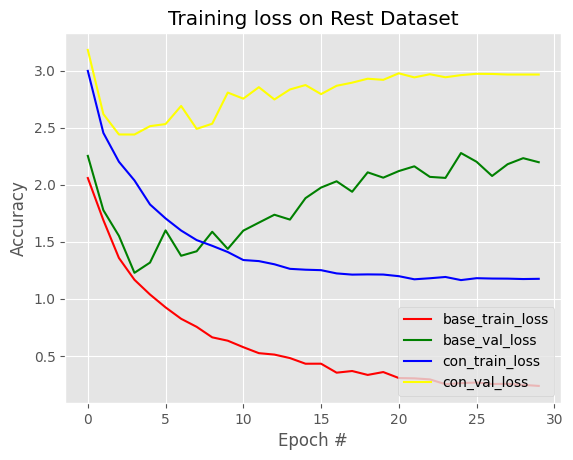

In [ ]:
import matplotlib.pyplot as plt
log_lap_base = "/home/student/hoa/NLP/TinyBert/ASC/OUT/Laptop/check/log.json"
log_rest_base = "/home/student/hoa/NLP/TinyBert/ASC/OUT/Rest/check/log.json"
log_lap_con = "/home/student/hoa/NLP/TinyBert/ASC/OUT/Laptop/check2/log.json"
log_rest_con = "/home/student/hoa/NLP/TinyBert/ASC/OUT/Rest/check2/log.json"
with open(log_lap_base,"r") as file:
    lap_data_base = json.load(file)
with open(log_rest_base,"r") as file:
    rest_data_base = json.load(file)
    
with open(log_lap_con,"r") as file:
    lap_data_con = json.load(file)
    
with open(log_rest_con,"r") as file:
    rest_data_con = json.load(file)
    
plt.style.use("ggplot")
plt.figure()
plt.plot(lap_data_base["train_" + "loss"], label="base_train_" + "loss",color = "red")
plt.plot(lap_data_base["val_" + "loss"], label="base_val_" + "loss",color = "green")
plt.plot(lap_data_con["train_" + "loss"], label="con_train_" + "loss",color="blue")
plt.plot(lap_data_con["val_" + "loss"], label="con_val_" + "loss",color="yellow")
plt.title("Training " + "loss" + " on Rest Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
# plt.savefig(os.path.join(args.output_dir, f'plot_train/{metric}.png'))
# plt.close()

In [129]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']